<a href="https://colab.research.google.com/github/HarshitGoel5/22BDS0189/blob/main/22BDS0189.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# 1. Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/horse.csv")

# DATA EXPLORATION
# 2. Print the entire dataset
print(df)

    surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        no  adult           530101         38.5   66.0              28.0   
1       yes  adult           534817         39.2   88.0              20.0   
2        no  adult           530334         38.3   40.0              24.0   
3       yes  young          5290409         39.1  164.0              84.0   
4        no  adult           530255         37.3  104.0              35.0   
..      ...    ...              ...          ...    ...               ...   
294     yes  adult           533886          NaN  120.0              70.0   
295      no  adult           527702         37.2   72.0              24.0   
296     yes  adult           529386         37.5   72.0              30.0   
297     yes  adult           530612         36.5  100.0              24.0   
298     yes  adult           534618         37.2   40.0              20.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
0              

In [44]:
# 3. Display dataset structure and attributes
print("Dataset Dimensions:", df.shape)
print("Attribute Names:", df.columns.tolist())
print("Dataset Structure:")
print(df.info())


Dataset Dimensions: (299, 28)
Attribute Names: ['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data']
Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    flo

In [45]:
# 4. Display first and last 3 rows
print("First 3 rows:")
print(df.head(3))
print("Last 3 rows:")
print(df.tail(3))


First 3 rows:
  surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced             NaN            more_3_sec   
1                 NaN              NaN   pale_cyanotic            less_3_sec   
2              normal           normal       pale_pink            less_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0  ...               45.0           8.4               NaN            NaN   
1  ...               50.0          85.0            cloudy            2.0   
2  ...               33.0           6.7               NaN            NaN   

      outcome  surgical_lesion lesion_1 lesion_2  lesion_3 

In [46]:
# HANDLING MISSING DATA
# 5. Check if there are any missing values
print("Are there any NA values?", df.isna().any().any())

Are there any NA values? True


In [47]:
#Replacing NA values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.500000,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.400000,NaN,3.039604,died,no,11300,0,0,no
1,yes,adult,534817,39.200000,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.000000,cloudy,2.000000,euthanized,no,2208,0,0,no
2,no,adult,530334,38.300000,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.700000,NaN,3.039604,lived,no,0,0,0,yes
3,yes,young,5290409,39.100000,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.200000,serosanguious,5.300000,died,yes,2208,0,0,yes
4,no,adult,530255,37.300000,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.400000,NaN,3.039604,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,38.168619,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.000000,NaN,3.039604,euthanized,no,3205,0,0,no
295,no,adult,527702,37.200000,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,24.274436,serosanguious,3.300000,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.500000,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.800000,NaN,3.039604,died,yes,3205,0,0,no
297,yes,adult,530612,36.500000,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.000000,serosanguious,3.400000,lived,yes,2208,0,0,yes


In [48]:
# 6. Summary of missing values
print("Missing Values Summary:")
print(df.isna().sum())

Missing Values Summary:
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph      0
rectal_exam_feces        102
abdomen                  118
packed_cell_volume         0
total_protein              0
abdomo_appearance        165
abdomo_protein             0
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


In [49]:
# 7. Total missing values per column (proportion)
print("Proportion of Missing Values:")
print(df.isna().mean())

Proportion of Missing Values:
surgery                  0.000000
age                      0.000000
hospital_number          0.000000
rectal_temp              0.000000
pulse                    0.000000
respiratory_rate         0.000000
temp_of_extremities      0.187291
peripheral_pulse         0.230769
mucous_membrane          0.157191
capillary_refill_time    0.107023
pain                     0.183946
peristalsis              0.147157
abdominal_distention     0.187291
nasogastric_tube         0.347826
nasogastric_reflux       0.354515
nasogastric_reflux_ph    0.000000
rectal_exam_feces        0.341137
abdomen                  0.394649
packed_cell_volume       0.000000
total_protein            0.000000
abdomo_appearance        0.551839
abdomo_protein           0.000000
outcome                  0.000000
surgical_lesion          0.000000
lesion_1                 0.000000
lesion_2                 0.000000
lesion_3                 0.000000
cp_data                  0.000000
dtype: float64


In [50]:
# 9. Count the total number of complete values in respiratory_rate and pulse
if "respiratory_rate" in df.columns and "pulse" in df.columns:
    print("Complete values in respiratory_rate:", df["respiratory_rate"].notna().sum())
    print("Complete values in pulse:", df["pulse"].notna().sum())

Complete values in respiratory_rate: 299
Complete values in pulse: 299


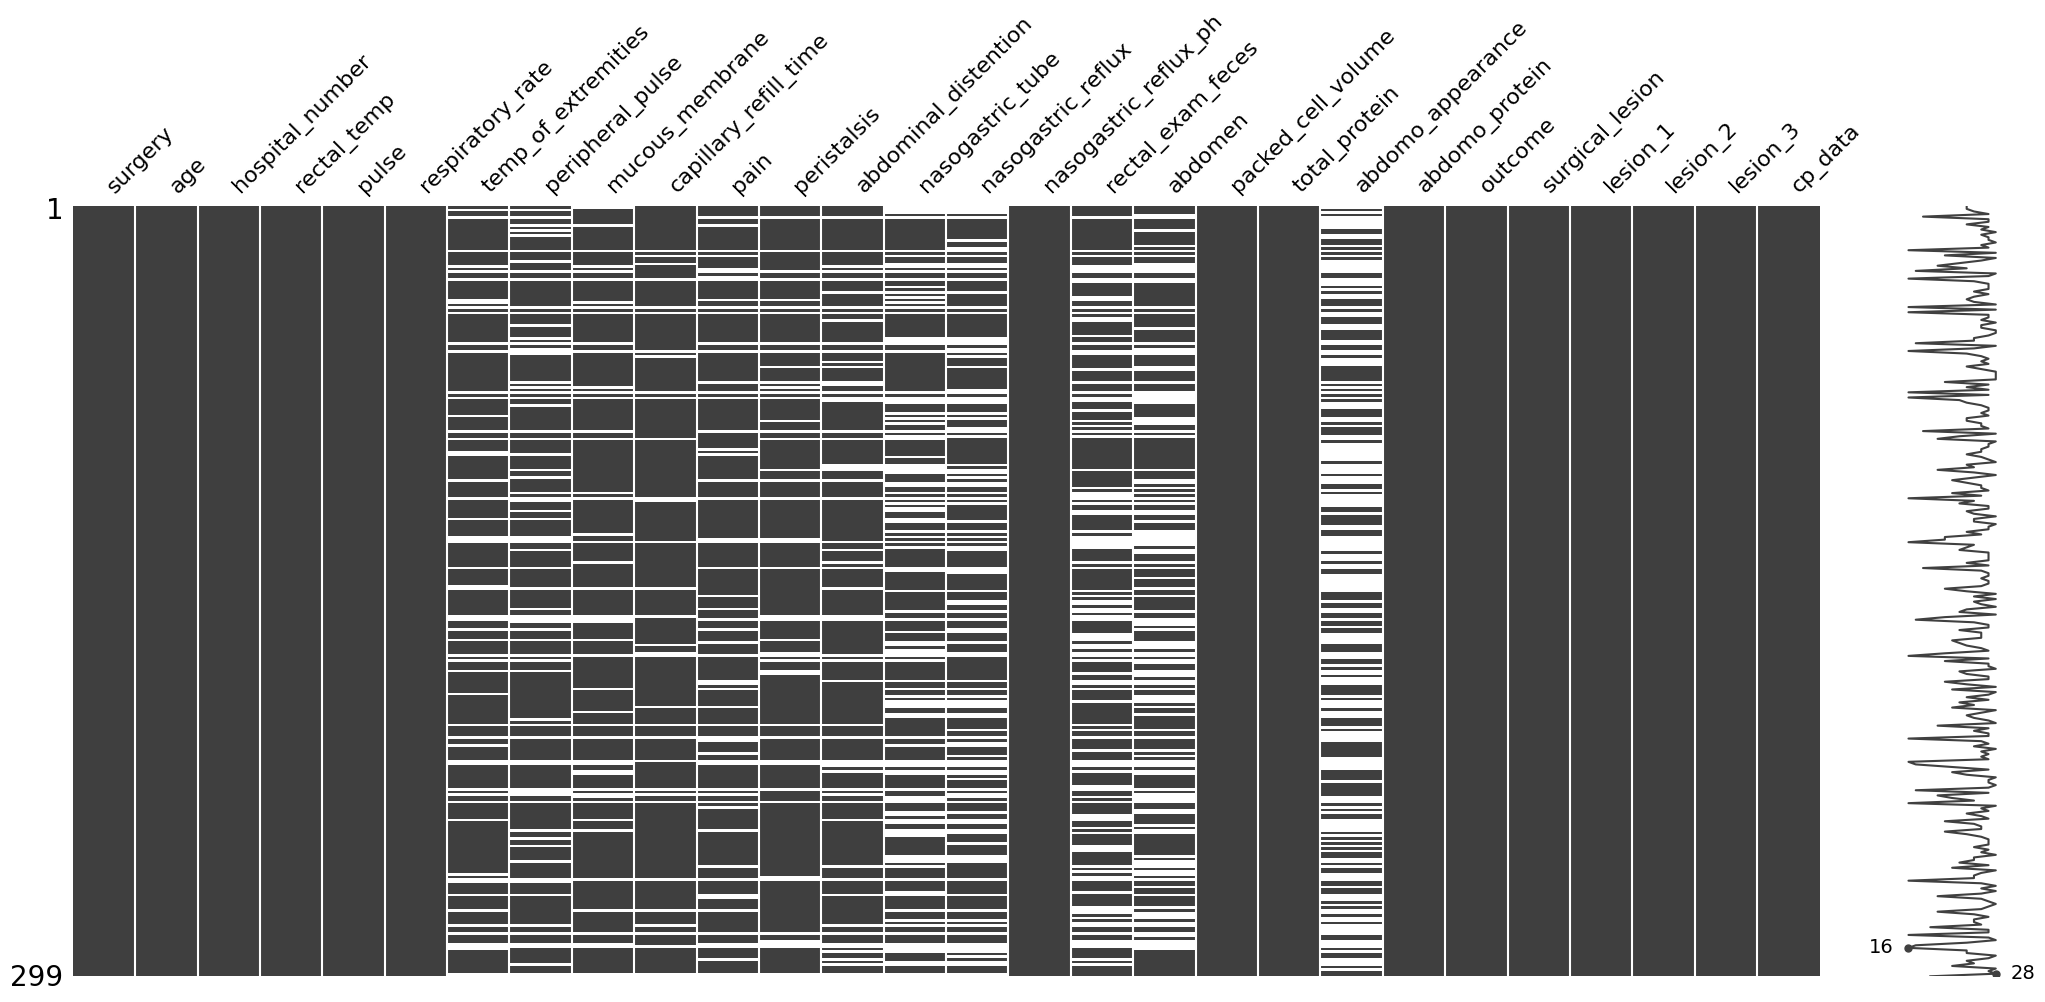

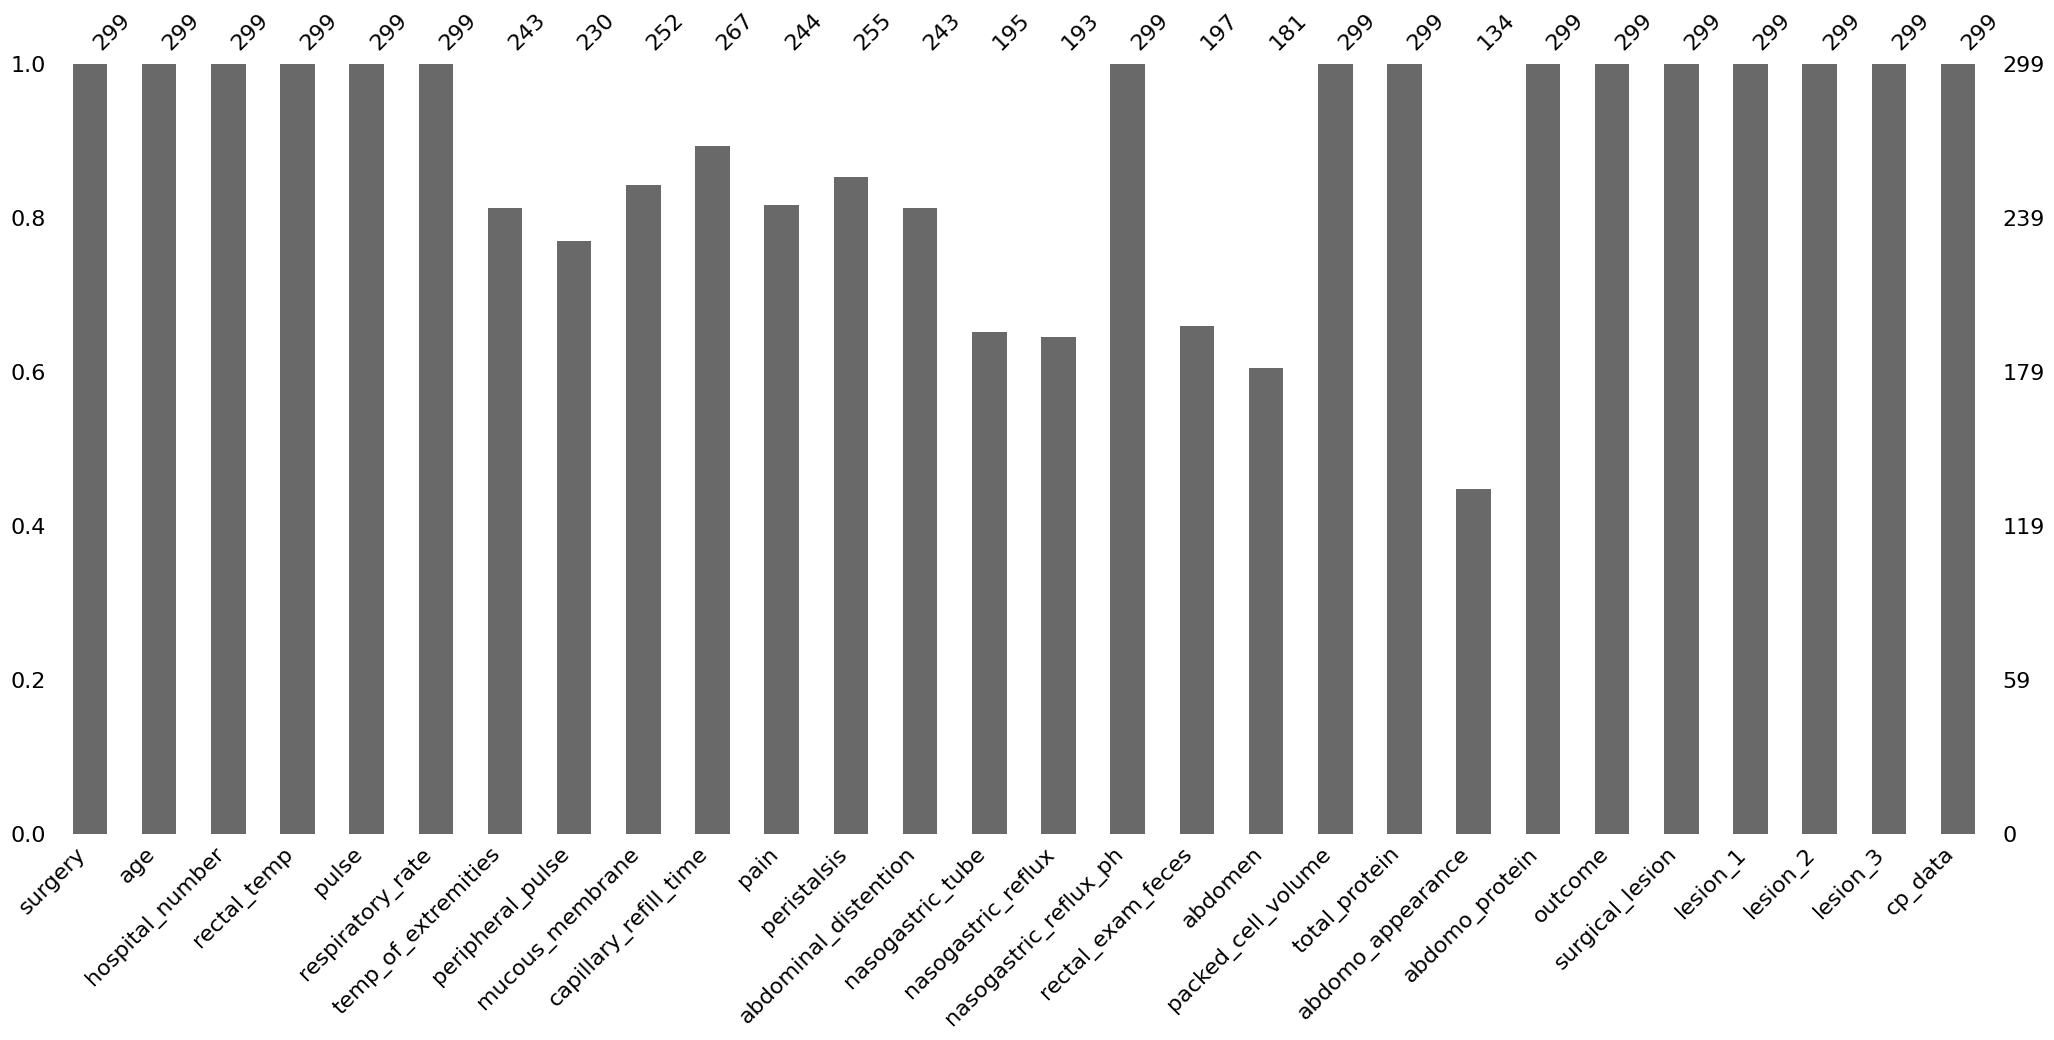

In [51]:
# 10. Missing values visualization
msno.matrix(df)
plt.show()
msno.bar(df)
plt.show()

In [52]:
# 11. Row-wise deletion of missing values
print("Dataset Dimensions before removing missing values:", df.shape)
df_cleaned = df.dropna()
print("Dataset after removing missing values:", df_cleaned.shape)

Dataset Dimensions before removing missing values: (299, 28)
Dataset after removing missing values: (43, 28)


In [53]:
# DATA CLEANING
# 12. Delete a column by index
df.drop(df.columns[2], axis=1, inplace=True)

In [54]:
#13. Find non-numeric values
non_numeric_counts = df.apply(lambda col: col.map(lambda x: not str(x).replace('.', '', 1).isdigit()).sum())
print("Non-numeric values per column:")
print(non_numeric_counts)

Non-numeric values per column:
surgery                  299
age                      299
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities      299
peripheral_pulse         299
mucous_membrane          299
capillary_refill_time    297
pain                     299
peristalsis              299
abdominal_distention     299
nasogastric_tube         299
nasogastric_reflux       299
nasogastric_reflux_ph      0
rectal_exam_feces        299
abdomen                  299
packed_cell_volume         0
total_protein              0
abdomo_appearance        299
abdomo_protein             0
outcome                  299
surgical_lesion          299
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                  299
dtype: int64


In [55]:
#14. Replacing NaN with 0
df.fillna(0, inplace=True)
df

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.500000,66.0,28.0,cool,reduced,0,more_3_sec,extreme_pain,...,45.0,8.400000,0,3.039604,died,no,11300,0,0,no
1,yes,adult,39.200000,88.0,20.0,0,0,pale_cyanotic,less_3_sec,mild_pain,...,50.0,85.000000,cloudy,2.000000,euthanized,no,2208,0,0,no
2,no,adult,38.300000,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,33.0,6.700000,0,3.039604,lived,no,0,0,0,yes
3,yes,young,39.100000,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,48.0,7.200000,serosanguious,5.300000,died,yes,2208,0,0,yes
4,no,adult,37.300000,104.0,35.0,0,0,dark_cyanotic,more_3_sec,0,...,74.0,7.400000,0,3.039604,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,38.168619,120.0,70.0,cold,0,pale_cyanotic,more_3_sec,depressed,...,55.0,65.000000,0,3.039604,euthanized,no,3205,0,0,no
295,no,adult,37.200000,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,...,44.0,24.274436,serosanguious,3.300000,euthanized,yes,2208,0,0,yes
296,yes,adult,37.500000,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,...,60.0,6.800000,0,3.039604,died,yes,3205,0,0,no
297,yes,adult,36.500000,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,...,50.0,6.000000,serosanguious,3.400000,lived,yes,2208,0,0,yes


In [57]:
# STATISTICAL ANALYSIS
# 15. Statistical summary
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
       rectal_temp       pulse  respiratory_rate  nasogastric_reflux_ph  \
count   299.000000  299.000000        299.000000             299.000000   
mean     38.168619   72.000000         30.460581               4.707547   
std       0.655730   27.468469         15.853977               0.828067   
min      35.400000   30.000000          8.000000               1.000000   
25%      37.900000   48.500000         20.000000               4.707547   
50%      38.168619   68.000000         30.000000               4.707547   
75%      38.500000   88.000000         34.500000               4.707547   
max      40.800000  184.000000         96.000000               7.500000   

       packed_cell_volume  total_protein  abdomo_protein      lesion_1  \
count          299.000000     299.000000      299.000000    299.000000   
mean            46.307407      24.274436        3.039604   3659.709030   
std              9.915919      25.804620        1.140001   5408.472421   
min    

In [58]:
# 16. Central tendency measures
print("Mean:", df.mean(numeric_only=True))
print("Median:", df.median(numeric_only=True))
print("Mode:", df.mode().iloc[0])

Mean: rectal_temp                38.168619
pulse                      72.000000
respiratory_rate           30.460581
nasogastric_reflux_ph       4.707547
packed_cell_volume         46.307407
total_protein              24.274436
abdomo_protein              3.039604
lesion_1                 3659.709030
lesion_2                   90.528428
lesion_3                    7.387960
dtype: float64
Median: rectal_temp                38.168619
pulse                      68.000000
respiratory_rate           30.000000
nasogastric_reflux_ph       4.707547
packed_cell_volume         46.000000
total_protein               7.700000
abdomo_protein              3.039604
lesion_1                 2322.000000
lesion_2                    0.000000
lesion_3                    0.000000
dtype: float64
Mode: surgery                          yes
age                            adult
rectal_temp                38.168619
pulse                           72.0
respiratory_rate           30.460581
temp_of_extremities      

In [61]:
# 20. Correlation matrix and Heatmap
print("Correlation Matrix:")
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


Correlation Matrix:
                       rectal_temp     pulse  respiratory_rate  \
rectal_temp               1.000000  0.201133          0.239180   
pulse                     0.201133  1.000000          0.439825   
respiratory_rate          0.239180  0.439825          1.000000   
nasogastric_reflux_ph     0.104388  0.002433          0.056472   
packed_cell_volume        0.056158  0.369850          0.073790   
total_protein            -0.053487 -0.079947         -0.077715   
abdomo_protein            0.005602  0.012911         -0.032565   
lesion_1                  0.053031  0.075095          0.152318   
lesion_2                 -0.060428 -0.001897         -0.020553   
lesion_3                  0.029324  0.101397          0.144714   

                       nasogastric_reflux_ph  packed_cell_volume  \
rectal_temp                     1.043877e-01            0.056158   
pulse                           2.432873e-03            0.369850   
respiratory_rate                5.647239e-02     

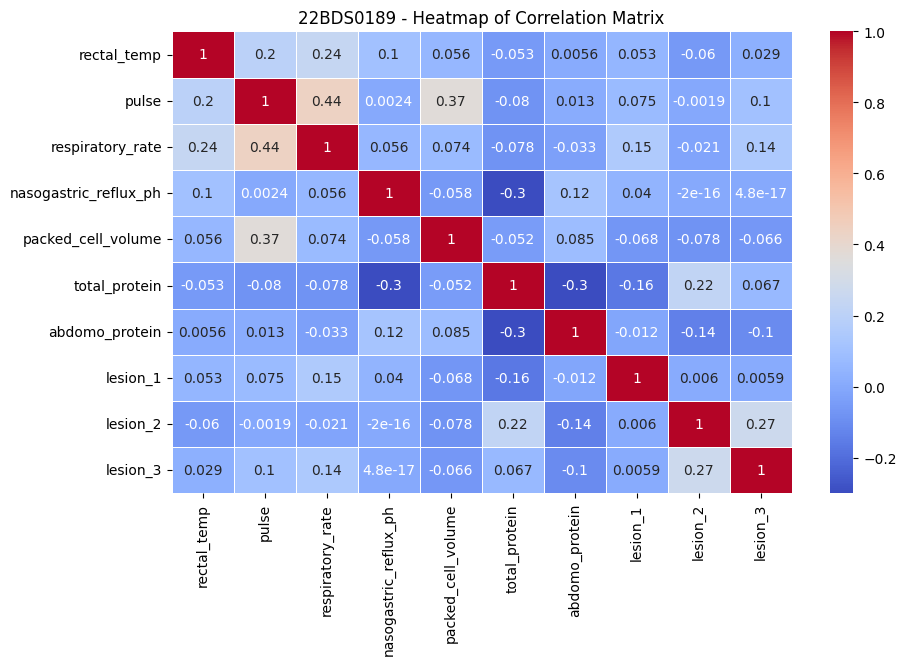

Correlation Matrix:
                       rectal_temp     pulse  respiratory_rate  \
rectal_temp               1.000000  0.201133          0.239180   
pulse                     0.201133  1.000000          0.439825   
respiratory_rate          0.239180  0.439825          1.000000   
nasogastric_reflux_ph     0.104388  0.002433          0.056472   
packed_cell_volume        0.056158  0.369850          0.073790   
total_protein            -0.053487 -0.079947         -0.077715   
abdomo_protein            0.005602  0.012911         -0.032565   
lesion_1                  0.053031  0.075095          0.152318   
lesion_2                 -0.060428 -0.001897         -0.020553   
lesion_3                  0.029324  0.101397          0.144714   

                       nasogastric_reflux_ph  packed_cell_volume  \
rectal_temp                     1.043877e-01            0.056158   
pulse                           2.432873e-03            0.369850   
respiratory_rate                5.647239e-02     

In [65]:
#21 Display Heatmap
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("22BDS0189 - Heatmap of Correlation Matrix")
plt.show()
print("Correlation Matrix:")
print(correlation_matrix)

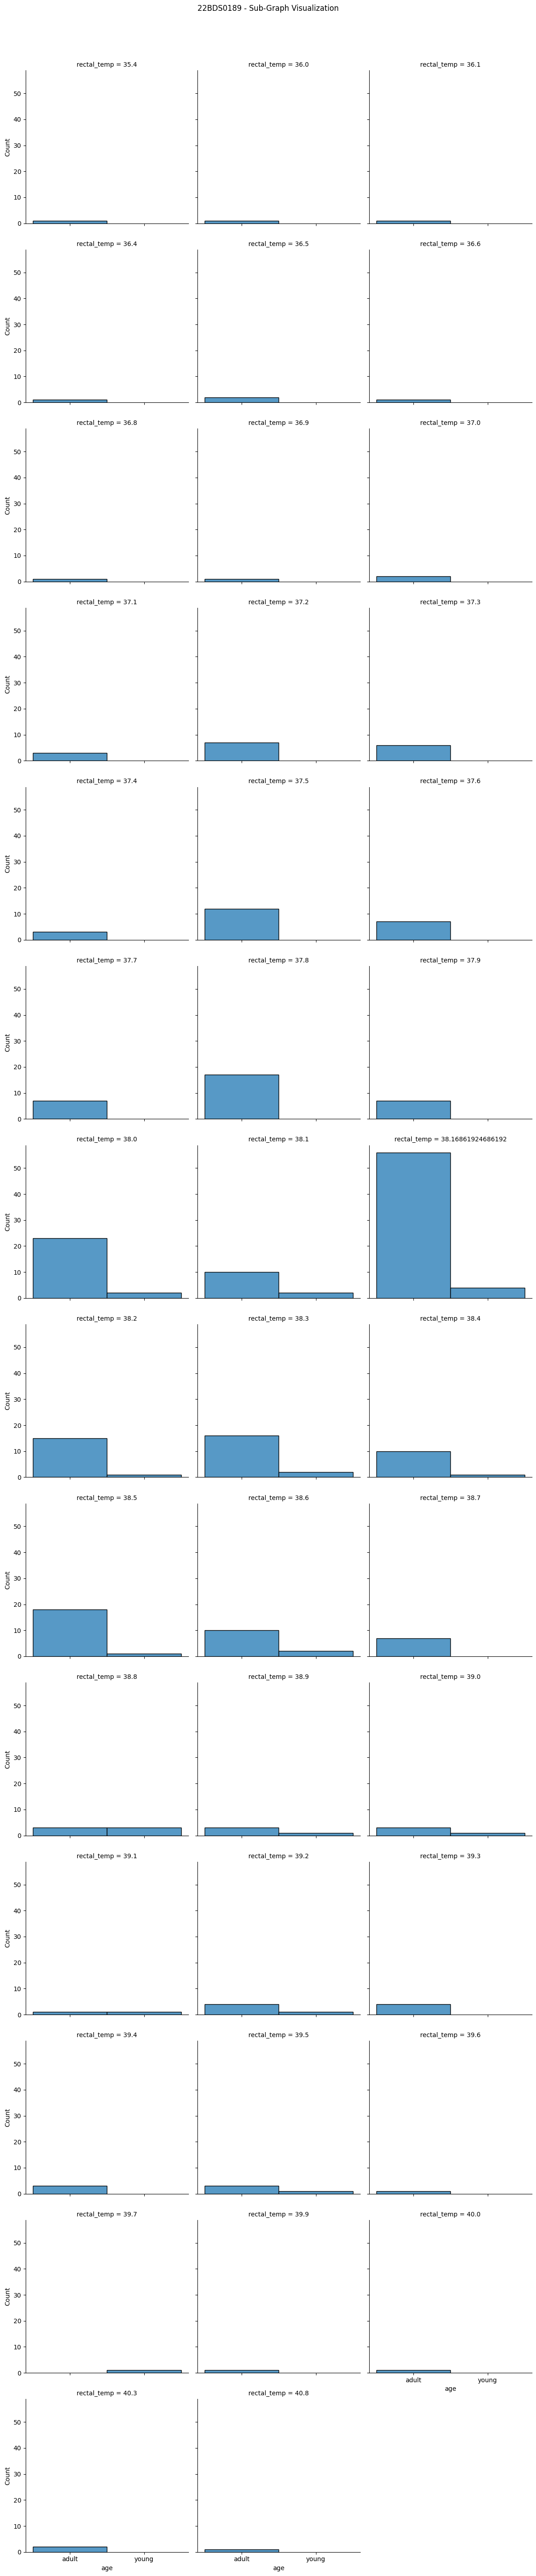

In [66]:
# DATA VISUALIZATION

# 22. Sub-Graph Visualization
if df.shape[1] > 2:
    g = sns.FacetGrid(df, col=df.columns[2], col_wrap=3, height=4)
    g.map_dataframe(sns.histplot, df.columns[1])
    plt.suptitle("22BDS0189 - Sub-Graph Visualization", y=1.02)
    plt.show()